# Single Layer Perceptron

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
class Perceptron(object):
    def __init__(self, eta=0, epochs=0, numEntradas = 0):
        self.eta = eta
        self.epochs = epochs
        self.numEntradas = numEntradas

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)                
            self.errors_.append(errors)
        erros = (errors * 100)/self.numEntradas            
        print("Percentual de acerto "+ str(100 - erros))
        print("Percentual de erro "+ str(erros))
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
NomeBase = "GLCM50"
#NomeBase = "Haralick50"
#NomeBase = "LBP50r_1_5_p_12"
#NomeBase = "LBP50r_1_p_4"
#NomeBase = "LBP50r_1_p_8"
#NomeBase = "LBP50r_2_p_16"
#NomeBase = "LBP50r_3_p_24"
#NomeBase = "MomentosHu50"
#NomeBase = "MomentosEstatisticos50"
#NomeBase = "MomentosCentrais50"

valor = 3
base = pd.read_csv('../Datasets/Base' + str(NomeBase)+'.txt', header=None)

atributo1 = int(input("Digite o valor para o atributo 1: "))
atributo2 = int(input("Digite o valor para o atributo 2: "))
epocas = int(input("Digite o número de épocas: "))
TaxAprend = float(input("Digite a taxa de aprendizado: "))


classes = base.iloc[:,len(base.columns)-valor].values
classesErro = base.iloc[:,len(base.columns)-valor+1].values
NumColunas = len(base.columns) - valor
entradas =  base.iloc[:, [atributo1,atributo2]].values

Digite o valor para o atributo 1: 5
Digite o valor para o atributo 2: 7
Digite o número de épocas: 100
Digite a taxa de aprendizado: 0.2


### Execução do Treinamento

In [4]:
classificacao = Perceptron(epochs=epocas, eta=TaxAprend, numEntradas = len(classes))
classificacao.train(entradas, classes)

Percentual de acerto 57.41260525644297
Percentual de erro 42.58739474355703


### Plotagem dos resultados

Pesos obtidos: [0.         0.09382716 0.33470054]


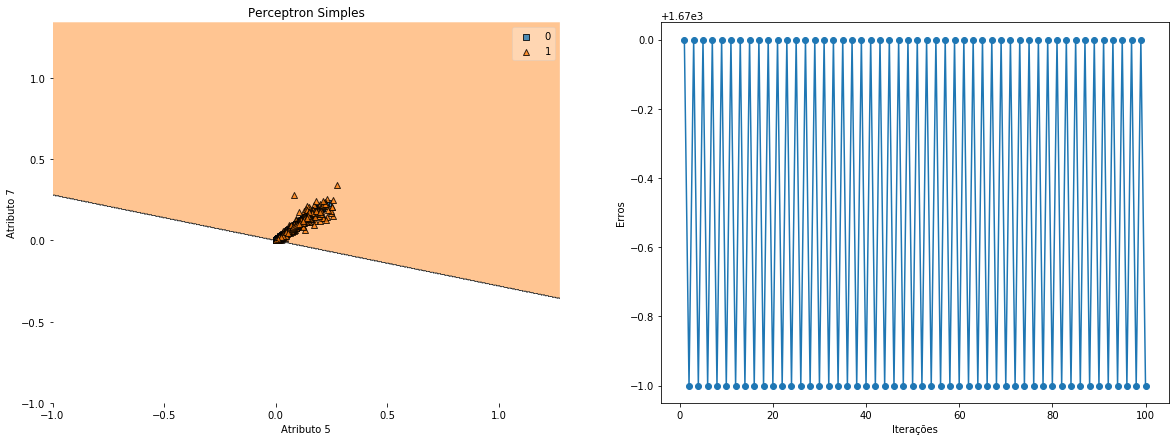

In [5]:
plt.rcParams['figure.figsize'] = (20,7)

print('Pesos obtidos: %s' % classificacao.w_)
plt.subplot(1,2,1)
plot_decision_regions(entradas, classes, clf=classificacao)
plt.title('Perceptron Simples')
plt.xlabel('Atributo '+str(atributo1))
plt.ylabel('Atributo '+str(atributo2))



plt.subplot(1,2,2)
plt.plot(range(1, len(classificacao.errors_)+1), classificacao.errors_, marker='o')
plt.xlabel('Iterações')
plt.ylabel('Erros')
plt.show()